# Dataset cleaning

In [1]:
from src.funcs import *
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns
import urllib3

# Matches

In [2]:
wc_matches_noclean = pd.read_csv('./Input/datasets_19728_29747_WorldCupMatches.csv')
wc_matches_noclean.isnull().sum().sort_values(ascending=False)
wc_matches = wc_matches_noclean.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
wc_matches['Year'] = wc_matches['Year'].astype(float).astype(int)
wc_matches['Home Team Goals'] = wc_matches['Home Team Goals'].astype(float).astype(int)
wc_matches['Away Team Goals'] = wc_matches['Away Team Goals'].astype(float).astype(int)
wc_matches['Half-time Home Goals'] = wc_matches['Half-time Home Goals'].astype(float).astype(int)
wc_matches['Half-time Away Goals'] = wc_matches['Half-time Away Goals'].astype(float).astype(int)
wc_matches2 = wc_matches[wc_matches.Year >= 1994]


<ipython-input-2-7a222cbba5cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_matches['Year'] = wc_matches['Year'].astype(float).astype(int)
<ipython-input-2-7a222cbba5cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_matches['Home Team Goals'] = wc_matches['Home Team Goals'].astype(float).astype(int)
<ipython-input-2-7a222cbba5cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

# Players (Sin utilizar)

In [3]:
#wc_players_noclean = pd.read_csv('./Input/WorldCupPlayers.csv')
#wc_players_noclean.isnull().sum().sort_values(ascending=False)
#wc_players_noclean.columns

#wc_players_noclean2 = wc_players_noclean[['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up','Shirt Number', 'Player Name']]
#wc_players = wc_players_noclean2.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False)
#wc_players.columns
#wc_players.to_csv(r'./Input/wc_players.csv')

# WC Winners (Sin utilizar)

In [4]:
#wc_winners = pd.read_csv('./Input/datasets_19728_29747_WorldCups.csv')
#wc_winners

# Web Scraping de la página de FIFA para obtener los rankings antes del comienzo de los mundiales(se empezó a hacer en 1992)

In [5]:
#Al tratarse de páginas webs diferentes, no he podido realizarlo con una función pues no sigue un patrón los cambios en el ID
fifa_94 = requests.get("https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id10/")
fifa94 = BeautifulSoup(fifa_94.text)
fifa_98 = requests.get("https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id50/")
fifa98 = BeautifulSoup(fifa_98.text)
fifa_02 = requests.get("https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id97/")
fifa02 = BeautifulSoup(fifa_02.text)
fifa_06 = requests.get("https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id145/")
fifa06 = BeautifulSoup(fifa_06.text)
fifa_10 = requests.get("https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id9276/")
fifa10 = BeautifulSoup(fifa_10.text)
fifa_14 = requests.get("https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id10719/")
fifa14 = BeautifulSoup(fifa_14.text)

In [6]:
ranking94= best_fifty(fifa94)
ranking98= best_fifty(fifa98)
ranking02= best_fifty(fifa02)
ranking06= best_fifty(fifa06)
ranking10= best_fifty(fifa10)
ranking14= best_fifty(fifa14)

In [7]:
rankfifty_94 = [nations_rank(i) for i in ranking94]
rankfifty_98 = [nations_rank(i) for i in ranking98]
rankfifty_02 = [nations_rank(i) for i in ranking02]
rankfifty_06 = [nations_rank(i) for i in ranking06]
rankfifty_10 = [nations_rank(i) for i in ranking10]
rankfifty_14 = [nations_rank(i) for i in ranking14]

['Brazil', '          BRA']
['Germany', '          GER']
['Sweden', '          SWE']
['Norway', '          NOR']
['Denmark', '          DEN']
['Argentina', '          ARG']
['Nigeria', '          NGA']
['Switzerland', '          SUI']
['Spain', '          ESP']
['Romania', '          ROU']
['Netherlands', '          NED']
['Republic of Ireland', '          IRL']
['Mexico', '          MEX']
['Uruguay', '          URU']
['England', '          ENG']
['Italy', '          ITA']
['France', '          FRA']
['Colombia', '          COL']
['Zambia', '          ZAM']
['Russia', '          RUS']
["Côte d'Ivoire", '          CIV']
['Portugal', '          POR']
['USA', '          USA']
['Cameroon', '          CMR']
['Egypt', '          EGY']
['Scotland', '          SCO']
['Poland', '          POL']
['Ghana', '          GHA']
['Bulgaria', '          BUL']
['Morocco', '          MAR']
['Tunisia', '          TUN']
['Greece', '          GRE']
['Northern Ireland', '          NIR']
['Belgium', '         

In [8]:
#Aquí ya obtengo las posiciones de los 6 mundiales que tuvieron posición en Data Frames
pdrankfifty_94 = pd.DataFrame(rankfifty_94)
pdrankfifty_98 = pd.DataFrame(rankfifty_98)
pdrankfifty_98['Year'].replace(1994,1998,inplace=True)
pdrankfifty_02 = pd.DataFrame(rankfifty_02)
pdrankfifty_02['Year'].replace(1994,2002,inplace=True)
pdrankfifty_06 = pd.DataFrame(rankfifty_06)
pdrankfifty_06['Year'].replace(1994,2006,inplace=True)
pdrankfifty_10 = pd.DataFrame(rankfifty_10)
pdrankfifty_10['Year'].replace(1994,2010,inplace=True)
pdrankfifty_14 = pd.DataFrame(rankfifty_14)
pdrankfifty_14['Year'].replace(1994,2014,inplace=True)

In [9]:
dataframes = (pdrankfifty_94,pdrankfifty_98,pdrankfifty_02,pdrankfifty_06,pdrankfifty_10,pdrankfifty_14)
pdrankfifty = pd.concat(dataframes, join='inner', ignore_index=True)
pdrankfifty.head(53)

,Year,Position,Country,Image
0,1994,1,Brazil,https://api.fifa.com/api/v1/picture/flags-sq-4...
1,1994,2,Germany,https://api.fifa.com/api/v1/picture/flags-sq-4...
2,1994,3,Sweden,https://api.fifa.com/api/v1/picture/flags-sq-4...
3,1994,4,Norway,https://api.fifa.com/api/v1/picture/flags-sq-4...
4,1994,5,Denmark,https://api.fifa.com/api/v1/picture/flags-sq-4...
5,1994,6,Argentina,https://api.fifa.com/api/v1/picture/flags-sq-4...
6,1994,7,Nigeria,https://api.fifa.com/api/v1/picture/flags-sq-4...
7,1994,8,Switzerland,https://api.fifa.com/api/v1/picture/flags-sq-4...
8,1994,9,Spain,https://api.fifa.com/api/v1/picture/flags-sq-4...
9,1994,10,Romania,https://api.fifa.com/api/v1/picture/flags-sq-4...


In [10]:
#Me quedo con los partidos que ocurren entre 1994 y 2014
wc_matches2 = wc_matches[wc_matches.Year >= 1994]
wc_matches2

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
464,1994,17 Jun 1994 - 19:30,Group C,Cotton Bowl,Dallas,Spain,2,2,Korea Republic,,56247.0,0,0,MIKKELSEN Peter (DEN),CHRISTENSEN Carl-Johan Meyer (DEN),PEARSON Roy (ENG),337.0,3050.0,ESP,KOR
465,1994,17 Jun 1994 - 15:00,Group C,Soldier Field,Chicago,Germany,1,0,Bolivia,,63117.0,0,0,BRIZIO CARTER Arturo (MEX),BRAZZALE Eugene (AUS),DUNSTER Gordon (AUS),337.0,3049.0,GER,BOL
466,1994,18 Jun 1994 - 11:30,Group A,Pontiac Silverdome,Detroit,USA,1,1,Switzerland,,73425.0,1,1,LAMOLINA Francisco Oscar (ARG),TAIBI Ernesto (ARG),ZARATE Venancio (PAR),337.0,3051.0,USA,SUI
467,1994,18 Jun 1994 - 16:00,Group E,Giants Stadium,New York/New Jersey,Italy,0,1,"rn"">Republic of Ireland",,75338.0,0,1,VAN DER ENDE Mario (NED),DOLSTRA Jan (NED),PARK Hae-Yong (KOR),337.0,3052.0,ITA,IRL
468,1994,18 Jun 1994 - 19:30,Group A,Rose Bowl,Los Angeles,Colombia,1,3,Romania,,91856.0,1,2,AL SHARIF Jamal (SYR),AL GHATTAN Yousif Abdulla (BAH),JAMES Douglas Micael (TRI),337.0,3053.0,COL,ROU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141.0,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267.0,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034.0,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [11]:
#Enriquezco mi dataset con el contenido de la página web de FIFA
wc_matches_clean = wc_matches2.merge(pdrankfifty, left_on=['Year', 'Home Team Name'], right_on=['Year', 'Country'], how='left')

In [12]:
wc_matches_clean.head()
wc_matches_clean.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'Position', 'Country', 'Image'],
      dtype='object')

In [13]:
wc_matches_clean = wc_matches_clean.merge(pdrankfifty, left_on=['Year', 'Away Team Name'], right_on=['Year', 'Country'],  how='left')

In [14]:
wc_matches_clean.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'Position_x', 'Country_x', 'Image_x', 'Position_y', 'Country_y',
       'Image_y'],
      dtype='object')

In [15]:
wc_matches_clean.head(75)
#Me quedo con las columnas que quiero que aparezcan en la terminal
wc_data = dropcol(wc_matches_clean)
wc_data.to_csv('./Input/wc_data.csv')

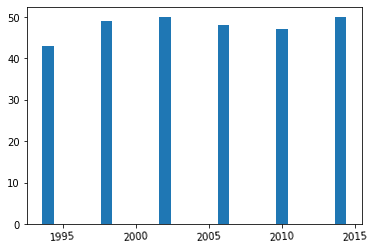

In [16]:
#He intentado sacar un gráfico que coincidiese con los años de los mundiales pero no lo he conseguido
plt.bar(wc_matches_clean['Year'],wc_matches_clean['Position_x'])
plt.xticks(rotation='4.0')
plt.savefig('./Output/plot.png',dpi=400)
plt.show()

In [17]:
for i in wc_matches_clean['Image_x']:
    print(i)

https://api.fifa.com/api/v1/picture/flags-sq-4/esp
https://api.fifa.com/api/v1/picture/flags-sq-4/ger
https://api.fifa.com/api/v1/picture/flags-sq-4/usa
https://api.fifa.com/api/v1/picture/flags-sq-4/ita
https://api.fifa.com/api/v1/picture/flags-sq-4/col
https://api.fifa.com/api/v1/picture/flags-sq-4/bel
https://api.fifa.com/api/v1/picture/flags-sq-4/nor
https://api.fifa.com/api/v1/picture/flags-sq-4/cmr
https://api.fifa.com/api/v1/picture/flags-sq-4/ned
https://api.fifa.com/api/v1/picture/flags-sq-4/bra
https://api.fifa.com/api/v1/picture/flags-sq-4/arg
https://api.fifa.com/api/v1/picture/flags-sq-4/nga
https://api.fifa.com/api/v1/picture/flags-sq-4/ger
https://api.fifa.com/api/v1/picture/flags-sq-4/rou
https://api.fifa.com/api/v1/picture/flags-sq-4/usa
https://api.fifa.com/api/v1/picture/flags-sq-4/ita
https://api.fifa.com/api/v1/picture/flags-sq-4/kor
https://api.fifa.com/api/v1/picture/flags-sq-4/mex
https://api.fifa.com/api/v1/picture/flags-sq-4/swe
https://api.fifa.com/api/v1/pic

In [18]:
r = imagerequest('Spain',wc_matches_clean['Image_x'])

In [19]:
type(r)
#he intentado sacar las fotos de todas las selecciones que tenía la URL

requests.models.Response

# Datos estadísticos


In [20]:
wcwinners = wc_matches_clean[wc_matches_clean.Stage == "Final"]


In [21]:
wcwinners['Position_x'].mean()

4.857142857142857

In [22]:
wcwinners['Position_y'].mean()

8.571428571428571

In [23]:
mean_finalists = round((4.85+8.57)/2)

In [24]:
mean_finalists
#La media del ranking fifa de los finalistas entre el 94-14 

7

In [25]:
wcwinners['Position_x'].max()
wcwinners['Position_y'].max()
#El finalista con menor ranking fue un 18 entre los mundiales del 94-14

18.0